In [323]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import re

In [324]:
file_path = './car_data2.json'  # Adjust the file path as needed
df = pd.read_json(file_path)

In [325]:
def extract_engine_l(engine_str):
    if isinstance(engine_str, str):  # Check if the input is a string
        match = re.search(r'(\d+\.\d+|\d+) *L', engine_str)
        return float(match.group(1)) if match else np.nan
    else:
        return np.nan  # Return NaN for non-string inputs
    
def convert_year_to_numeric(year_str):
    try:
        return int(year_str)
    except ValueError:
        return np.nan  # Return NaN if the conversion fails



def handle_mpg(mpg_str):
    if isinstance(mpg_str, str):  # Ensure the input is a string
        if '-' in mpg_str:
            parts = mpg_str.split('-')
            # Ensure both parts are numbers
            if all(part.isdigit() for part in parts):
                low, high = map(int, parts)
                return (low + high) / 2
        try:
            return float(mpg_str)
        except ValueError:
            return np.nan  # Return NaN if conversion fails
    elif isinstance(mpg_str, (int, float)):  # If it's already a number, just return it
        return mpg_str
    else:
        return np.nan  # Return NaN for any other unexpected data types

def safe_convert_to_int(mileage_str):
    # Remove ' mi.' and commas
    if isinstance(mileage_str, str):  # Ensure the input is a string
        clean_str = mileage_str.replace(' mi.', '').replace(',', '')
    # Try to convert to integer, handle cases where the conversion would fail
        try:
            return int(clean_str)
        except ValueError:
        # Return None or a specific value that indicates missing or malformed data
            return np.nan
    elif isinstance(mileage_str, (int, float)):  # If it's already a number, just return it
        return mileage_str

def safe_convert_price(price_str):
    # Remove '$' and commas
    if isinstance(price_str, str):  # Ensure the input is a string
        clean_str = price_str.replace('$', '').replace(',', '')
    # Try to convert to integer, handle cases where the conversion would fail
        try:
            return int(clean_str)
        except ValueError:
        # Return None or a specific value that indicates missing or malformed data
            return np.nan
    elif isinstance(price_str, (int, float)):  # If it's already a number, just return it
        return price_str
def handle_fuel_type(value):
    if pd.isna(value):
        return np.nan  # Handle null values explicitly if needed
    return 0 if value == 'Hybrid' else 1 if value == 'Gasoline' else np.nan

def handle_accidents(value):
    if pd.isna(value):
        return np.nan
    return 0 if value == 'None reported' else 1

def count_features(value):
    if pd.isna(value):
        return 0
    return len(value.split('\n'))

def handle_transmission(value):
    if pd.isna(value):
        return np.nan
    return 1 if 'manual' in value.lower() else 0

def handle_clean_title(value):
    if pd.isna(value):
        return np.nan
    return 1 if value.lower() == 'yes' else 0 if value.lower() == 'no' else np.nan

def handle_entertainment(value):
    if pd.isna(value):
        return 0
    # Splitting by various delimiters
    features = re.split(r'\u00ae/|\u00ae\n', value)
    # Counting non-empty entries after split to avoid counting empty strings as features
    return len([feature for feature in features if feature.strip()])

In [326]:
# Assuming df is your DataFrame loaded from the JSON file
df['Engine L'] = df['Engine'].apply(extract_engine_l)

# Verify outputs
print(df[['Engine', 'Engine L']].head())

                                              Engine  Engine L
0  2.5L I-4 DOHC, variable valve control, regular...       2.5
1                        2.5L I4 16V PDI DOHC Hybrid       2.5
2                             4.0L V6 DOHC VVT-i 24V       4.0
3                              4.0L V6 24V MPFI DOHC       4.0
4                              1.5L I4 16V MPFI DOHC       1.5


In [327]:

# Applying transformations
df['Model Year'] = df['Model Year'].apply(convert_year_to_numeric)

df['Fuel type'] = df['Fuel type'].apply(handle_fuel_type)
df['Personal use only'] = df['Personal use only'].map({'Yes': 1, 'No': 0})
df['1-owner vehicle'] = df['1-owner vehicle'].map({'Yes': 1, 'No': 0})
df['Accidents or damage'] = df['Accidents or damage'].apply(handle_accidents)
df['Safety features count'] = df['Safety'].apply(count_features)
df['Entertainment features count'] = df['Entertainment'].apply(handle_entertainment)
df['Transmission type'] = df['Transmission'].apply(handle_transmission)
df['Convenience count'] = df['Convenience'].apply(count_features)
df['Clean title'] = df['Clean title'].apply(handle_clean_title)  # Assuming there's a column 'Clean title'
df['MPG'] = df['MPG'].apply(handle_mpg)
df['Engine'] = df['Engine'].apply(extract_engine_l)
df['Mileage'] = df['Mileage'].apply(safe_convert_to_int)
median_mileage = df['Mileage'].median()
df['Mileage'].fillna(median_mileage, inplace=True)
df['Last Listed Price'] = df['Last Listed Price'].apply(safe_convert_price)
median_price = df['Last Listed Price'].median()
df['Last Listed Price'].fillna(median_price, inplace=True)

# Filling missing horsepower values with the median
df['Engine'].fillna(df['Engine'].median(), inplace=True)
# Example of filling missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# df.fillna({
#     'Engine': df['Engine'].median(),
#     'MPG': df['MPG'].median(),
#     'Mileage': df['Mileage'].median()
# }, inplace=True)

C:\Users\batuh\AppData\Local\Temp\ipykernel_24304\971199538.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(median_mileage, inplace=True)
C:\Users\batuh\AppData\Local\Temp\ipykernel_24304\971199538.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [328]:
print(df[['Entertainment', 'Entertainment features count']].head())

                                       Entertainment  \
0                                                NaN   
1  Apple CarPlay®/Android Auto®\nBluetooth®\nHome...   
2                                                NaN   
3                                         Bluetooth®   
4                                         Bluetooth®   

   Entertainment features count  
0                             0  
1                             4  
2                             0  
3                             1  
4                             1  


In [329]:
# categorical_columns = ['Exterior color', 'Interior color', 'Drivetrain', 'Fuel type', 'Transmission',"VIN","Stock #","Convenience","Entertainment"]
# df_encoded = pd.get_dummies(df, columns=categorical_columns)

keep_columns = [
    'Engine','Model Year', 'MPG', 'Mileage', 
    'Fuel type', 'Personal use only', '1-owner vehicle',
    'Accidents or damage', 'Safety features count',
    'Entertainment features count', 'Transmission type',
    'Convenience count','Last Listed Price'
]

# Filter the DataFrame to only include these columns
df_encoded = df[keep_columns]




# print(df.head)
display(df_encoded)

,Engine,Model Year,MPG,Mileage,Fuel type,Personal use only,1-owner vehicle,Accidents or damage,Safety features count,Entertainment features count,Transmission type,Convenience count,Last Listed Price
0,2.5,2011,27.0,169197.0,1.0,1.0,1.0,1.0,3,0,0,0,7594.0
1,2.5,2023,36.0,45807.0,0.0,0.0,1.0,0.0,5,4,0,3,40899.0
2,4.0,2007,17.5,217723.0,1.0,1.0,0.0,1.0,3,0,1,0,9999.0
3,4.0,2012,18.5,63719.0,1.0,1.0,1.0,0.0,2,1,0,0,28988.0
4,1.5,2012,32.5,120733.0,1.0,1.0,0.0,1.0,2,1,0,0,9227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.5,2018,23.0,63537.5,1.0,0.0,0.0,0.0,5,2,0,1,25241.5
97,2.2,1999,26.5,190664.0,1.0,1.0,0.0,0.0,0,0,0,0,5477.0
98,1.8,2011,49.5,202938.0,1.0,1.0,0.0,0.0,3,1,0,2,8995.0
99,5.7,2016,15.5,87598.0,1.0,0.0,1.0,0.0,8,2,0,5,56995.0


In [330]:
X = df_encoded.drop('Last Listed Price', axis=1)
y = df_encoded['Last Listed Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [331]:
### 3. Build and Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [332]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Model Root Mean Squared Error: {rmse}')

Model Root Mean Squared Error: 6633.569471669044


In [333]:
average_price = df['Last Listed Price'].mean()
rmse_percent = (6633.66 / average_price) * 100
print(rmse_percent)

24.877470412968076


In [334]:
mean_price = np.mean(y_test)
baseline_predictions = [mean_price] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 11839.63162582128


In [335]:
correlation_matrix = df_encoded.corr()
display(correlation_matrix)

,Engine,Model Year,MPG,Mileage,Fuel type,Personal use only,1-owner vehicle,Accidents or damage,Safety features count,Entertainment features count,Transmission type,Convenience count,Last Listed Price
Engine,1.000000,-0.096499,-0.641256,0.191877,0.212881,0.023040,0.026089,-0.202018,-0.024595,-0.105081,-0.162311,0.058939,0.395108
Model Year,-0.096499,1.000000,0.254520,-0.795654,-0.297029,-0.187154,0.434688,-0.149895,0.730476,0.798396,-0.262287,0.610176,0.511239
MPG,-0.641256,0.254520,1.000000,-0.266370,-0.523070,-0.111299,0.000690,0.028386,0.064037,0.289105,-0.019466,0.131713,-0.149289
Mileage,0.191877,-0.795654,-0.266370,1.000000,0.300681,0.179434,-0.407101,0.228979,-0.608644,-0.654234,0.066377,-0.471957,-0.492995
Fuel type,0.212881,-0.297029,-0.523070,0.300681,1.000000,0.038095,-0.075753,-0.105711,-0.231529,-0.346766,0.139814,-0.436369,-0.157941
Personal use only,0.023040,-0.187154,-0.111299,0.179434,0.038095,1.000000,-0.125435,0.196462,-0.200099,-0.108628,0.043751,-0.098978,-0.107345
1-owner vehicle,0.026089,0.434688,0.000690,-0.407101,-0.075753,-0.125435,1.000000,-0.273614,0.246112,0.393036,-0.012576,0.196819,0.331805
Accidents or damage,-0.202018,-0.149895,0.028386,0.228979,-0.105711,0.196462,-0.273614,1.000000,-0.107926,-0.116252,-0.050992,-0.070788,-0.236746
Safety features count,-0.024595,0.730476,0.064037,-0.608644,-0.231529,-0.200099,0.246112,-0.107926,1.000000,0.705036,-0.194756,0.708259,0.409212
Entertainment features count,-0.105081,0.798396,0.289105,-0.654234,-0.346766,-0.108628,0.393036,-0.116252,0.705036,1.000000,-0.241118,0.588060,0.313393


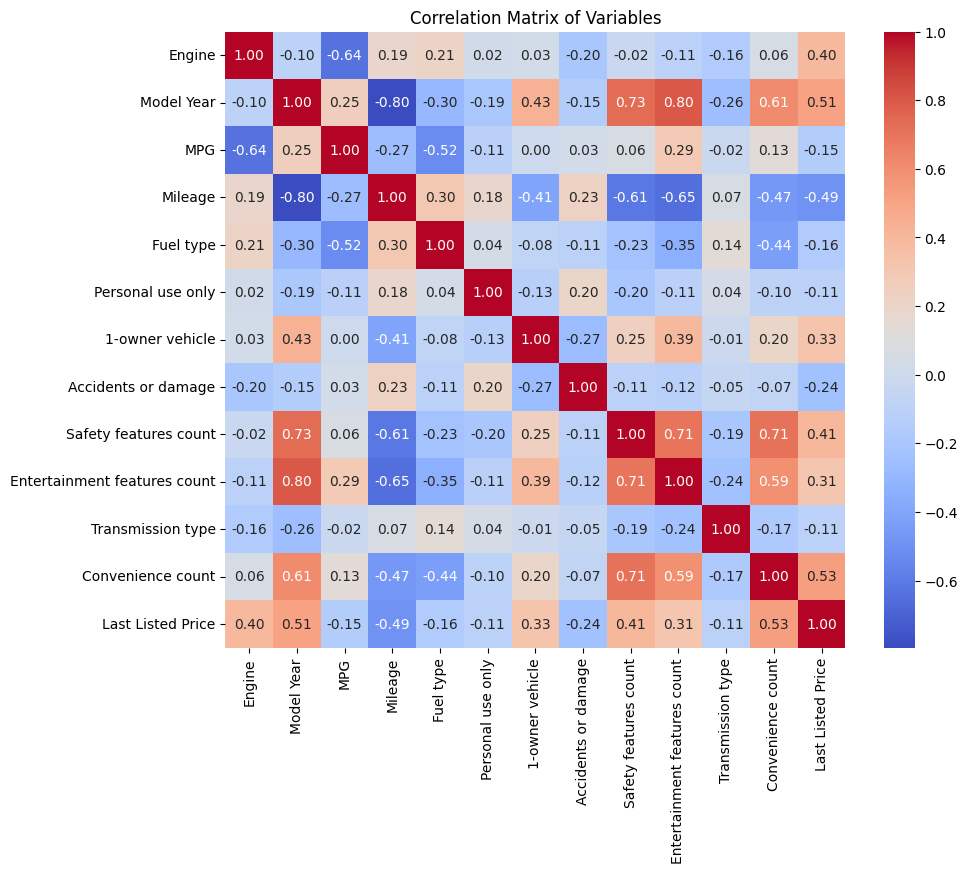

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


In [337]:
# Assuming df is your DataFrame and 'Last Listed Price' is your target for regression

df=df_encoded
median_price = df['Last Listed Price'].median()
# Create a binary target variable
df['Price Category'] = (df['Last Listed Price'] > median_price).astype(int)  # 1 if above median, 0 if below


In [338]:
# Use all or selected features from your regression model
features = df.drop(['Last Listed Price', 'Price Category'], axis=1)
target = df['Price Category']


In [339]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [340]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [341]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

predictions = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("ROC AUC Score:", roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1]))


Accuracy: 0.6190476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.67      0.22      0.33         9

    accuracy                           0.62        21
   macro avg       0.64      0.57      0.53        21
weighted avg       0.63      0.62      0.56        21

ROC AUC Score: 0.7592592592592593


In [342]:
correlations = df.corr()['Last Listed Price'].drop('Last Listed Price')  # Exclude self-correlation

# Filter features based on the correlation threshold
selected_features = correlations[abs(correlations) > 0.2].index.tolist()
print(f"Selected features based on correlation > 0.2: {selected_features}")


Selected features based on correlation > 0.2: ['Engine', 'Model Year', 'Mileage', '1-owner vehicle', 'Accidents or damage', 'Safety features count', 'Entertainment features count', 'Convenience count', 'Price Category']


In [343]:
df_reduced = df[selected_features + ['Last Listed Price']]
df_reduced=df_reduced.drop('Price Category', axis=1)

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Using the full feature set
X_full = df.drop('Last Listed Price', axis=1)
y_full = df['Last Listed Price']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Using the reduced feature set
X_reduced = df_reduced.drop('Last Listed Price', axis=1)
y_reduced = df_reduced['Last Listed Price']
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Fit and evaluate the full model
model_full = RandomForestRegressor(random_state=42)
model_full.fit(X_train_full, y_train_full)
mse_full = mean_squared_error(y_test_full, model_full.predict(X_test_full))

# Fit and evaluate the reduced model
model_reduced = RandomForestRegressor(random_state=42)
model_reduced.fit(X_train_reduced, y_train_reduced)
mse_reduced = mean_squared_error(y_test_reduced, model_reduced.predict(X_test_reduced))

print(f"Full model MSE: {mse_full}")
print(f"Reduced model MSE: {mse_reduced}")

Full model MSE: 46744025.63692142
Reduced model MSE: 39986620.32936666


In [345]:
correlation_matrix = df_reduced.corr()
display(correlation_matrix)

,Engine,Model Year,Mileage,1-owner vehicle,Accidents or damage,Safety features count,Entertainment features count,Convenience count,Last Listed Price
Engine,1.000000,-0.096499,0.191877,0.026089,-0.202018,-0.024595,-0.105081,0.058939,0.395108
Model Year,-0.096499,1.000000,-0.795654,0.434688,-0.149895,0.730476,0.798396,0.610176,0.511239
Mileage,0.191877,-0.795654,1.000000,-0.407101,0.228979,-0.608644,-0.654234,-0.471957,-0.492995
1-owner vehicle,0.026089,0.434688,-0.407101,1.000000,-0.273614,0.246112,0.393036,0.196819,0.331805
Accidents or damage,-0.202018,-0.149895,0.228979,-0.273614,1.000000,-0.107926,-0.116252,-0.070788,-0.236746
Safety features count,-0.024595,0.730476,-0.608644,0.246112,-0.107926,1.000000,0.705036,0.708259,0.409212
Entertainment features count,-0.105081,0.798396,-0.654234,0.393036,-0.116252,0.705036,1.000000,0.588060,0.313393
Convenience count,0.058939,0.610176,-0.471957,0.196819,-0.070788,0.708259,0.588060,1.000000,0.527464
Last Listed Price,0.395108,0.511239,-0.492995,0.331805,-0.236746,0.409212,0.313393,0.527464,1.000000


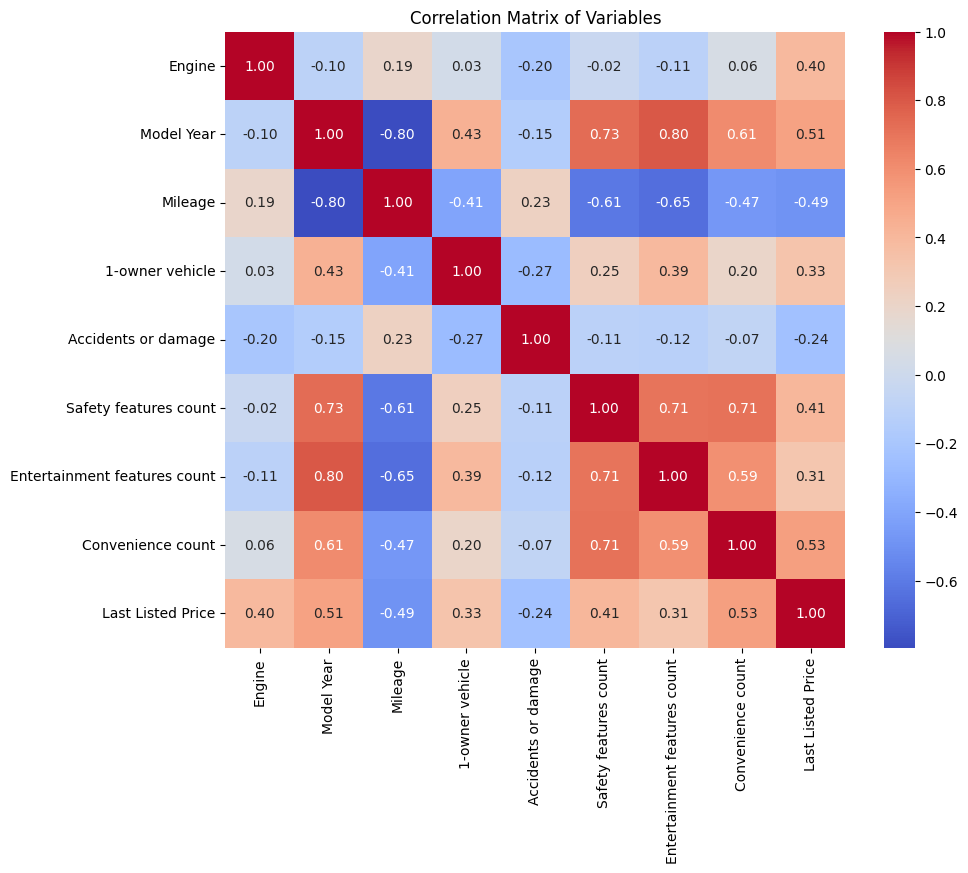

In [346]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

In [347]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the parameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit grid search to the data
grid_search.fit(X_train_reduced, y_train_reduced)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best RMSE: 9156.066281972875


In [348]:
# Use the best parameters from the grid search
best_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=42
)

# Train the model using the training set
best_model.fit(X_train_reduced, y_train_reduced)

# Predict on the testing set
y_pred = best_model.predict(X_test_reduced)

# Calculate the RMSE for the testing set
test_rmse = np.sqrt(mean_squared_error(y_test_reduced, y_pred))
print(f"Test RMSE: {test_rmse}")


Test RMSE: 6301.959560298149


In [349]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train_reduced.shape[1]):
    print(f"{f + 1}. feature {X_train_reduced.columns[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. feature Engine (0.2749524176826565)
2. feature Convenience count (0.21411499423077962)
3. feature Mileage (0.20958746161807584)
4. feature Model Year (0.17700110206690806)
5. feature Safety features count (0.04991924775430696)
6. feature Entertainment features count (0.04489137102604173)
7. feature Accidents or damage (0.01588024208256025)
8. feature 1-owner vehicle (0.013653163538671102)


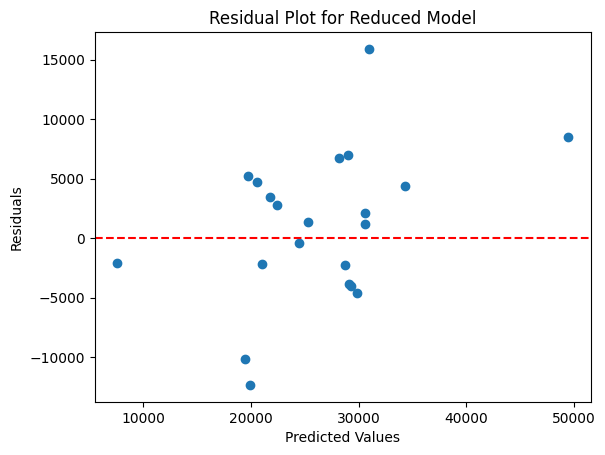

In [351]:
# Assuming `model_reduced` has been fit as shown in your script
# Predict on the test set
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Calculate residuals
residuals_reduced = y_test_reduced - y_pred_reduced

# Plotting residuals
plt.scatter(y_pred_reduced, residuals_reduced)
plt.title('Residual Plot for Reduced Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


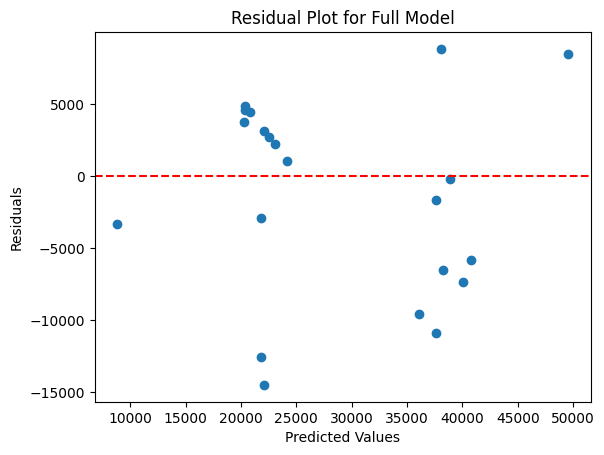

In [353]:
# Predict on the test set for the full model
y_pred_full = model_full.predict(X_test_full)

# Calculate residuals for the full model
residuals_full = y_test_full - y_pred_full

# Plotting residuals for the full model
plt.scatter(y_pred_full, residuals_full)
plt.title('Residual Plot for Full Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

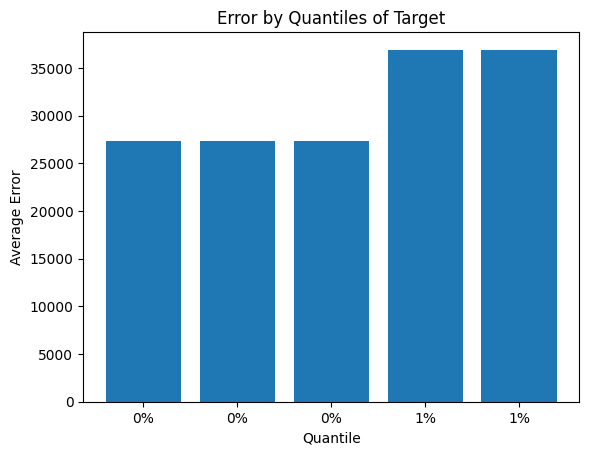

In [ ]:
import numpy as np
quantiles = np.percentile(y_test, [10, 25, 50, 75, 90])
quantile_errors = [np.mean(residuals[(y_test >= q) & (y_test < q+10)]) for q in quantiles]

plt.bar(range(len(quantiles)), quantile_errors, tick_label=[f'{int(q)}%' for q in quantiles])
plt.title('Error by Quantiles of Target')
plt.xlabel('Quantile')
plt.ylabel('Average Error')
plt.show()


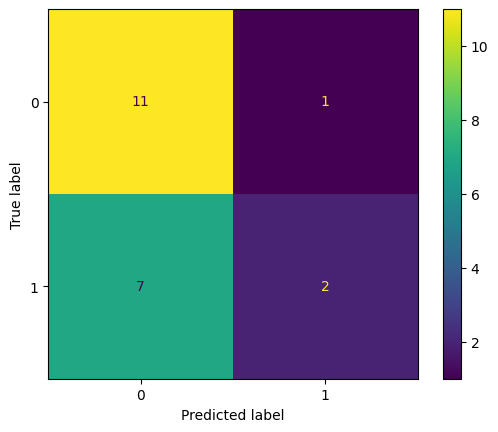

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
